# Testing alternative parameterization for effective population size in NAT


I'll test the followig models:

1. Constant size
2. Two epochs.
3. Expansion.
4. Three epochs.

In addition to the deme's population size parameters. I will also infer the split branch from CHB, all other parameters will be fixed and constant.


In [25]:
import os
import glob
import moments
import demes
import demesdraw
import matplotlib
import matplotlib.pyplot as plt
import pickle
import gzip
from IPython.display import Markdown as md
import warnings

# Function for printing syntax-highlighted YAML demes models
# If there is a better way to do this, tell me!!
def print_model(file_path):
    with open(file_path) as f:
        lines = f.read()
    return md("```yaml\n" + lines + "```")

warnings.filterwarnings('ignore')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rc('font', **font)


# Parametrizations to test

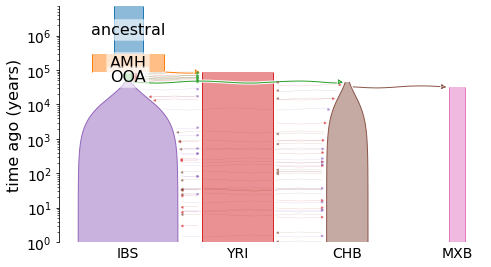

In [26]:
# Constant size
m1 = demes.load('./model-parametrizations/01ConstantSize.yml')
demesdraw.tubes(m1, log_time=True);

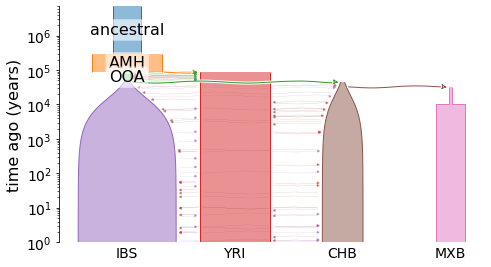

In [27]:
# two epochs
m2 = demes.load('./model-parametrizations/02TwoEpochs.yml')
demesdraw.tubes(m2, log_time=True);

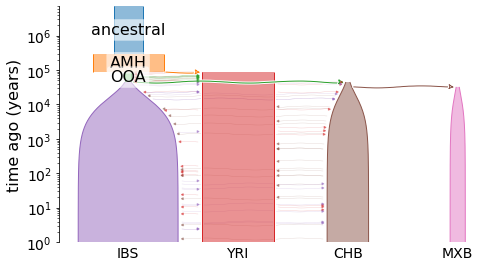

In [28]:
# Exponential growth
m3 = demes.load('./model-parametrizations/03ExponentialChange.yml')
demesdraw.tubes(m3, log_time=True);

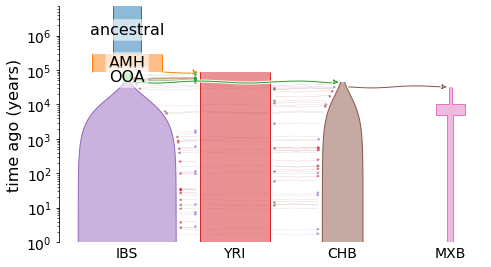

In [29]:
# 3 epochs
m4 = demes.load('./model-parametrizations/04ThreeEpochs.yml')
demesdraw.tubes(m4, log_time=True);

# Results

In [30]:
# data
sf = "../../data/210804-Compute-jSFS/data/spectrums/5d-csq-synonymous-spectrum.pkl.gz"
with gzip.open(sf, "rb") as f:
    sf = pickle.load(f)

print(sf.pop_ids)

## marginalize
sf = sf.marginalize([3])
print("marginalizing to: ", sf.pop_ids)


## project and fold
sf = sf.project([15, 15, 35, 15]) # MXB has the 3rd spot, we want more info there
## 
sf = sf.fold()
print(sf.shape)

['CHB', 'IBS', 'MXB', 'MXL', 'YRI']
marginalizing to:  ['CHB', 'IBS', 'MXB', 'YRI']
(16, 16, 36, 16)


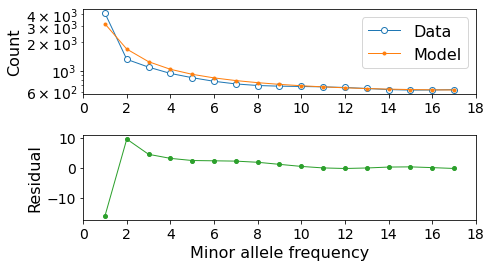

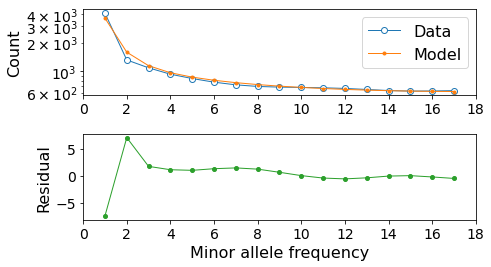

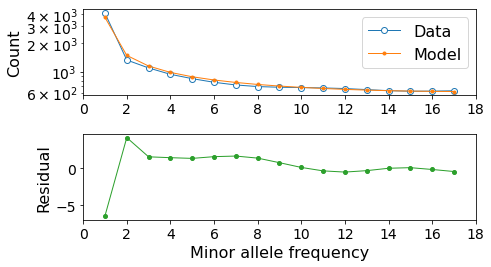

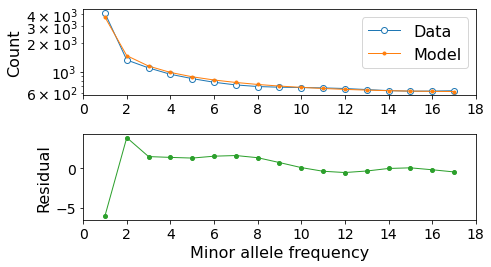

[None, None, None, None]

In [31]:
def visualize_results(mdl_yml):
    """
    Generates output plot to visualize obtained model
    """
    mdl_name = mdl_yml.replace('results/', '').replace('-best.yml', '')
    
    out_p1 = os.path.join('plots/', mdl_name + '-demes.pdf')
    out_p2 = os.path.join('plots/', mdl_name + '-residuals.pdf')
    
    # first we visualize the obtained model
    colors = {
        'ancestral': '#66c2a5',
        'AMH': '#fc8d62',
        'YRI': '#8da0cb',
        'OOA': '#e78ac3',
        'IBS': '#a6d854',
        'CHB': '#ffd92f',
        'MXB': '#e5c494'
    }
    
    inferred_model = demes.load(mdl_yml)
    demesdraw.tubes(inferred_model, log_time=True, colours=colors, num_lines_per_migration=1)
    plt.savefig(out_p1)
    
    # model data
    sf_expected = moments.Spectrum.from_demes(mdl_yml, sampled_demes=sf.pop_ids, sample_sizes=sf.sample_sizes)
    
    moments.Plotting.plot_1d_comp_multinom(
        model = sf_expected.marginalize([0, 1, 3]),
        data = sf.marginalize([0, 1, 3]),
        out=out_p2
    )
    
    return None

[visualize_results(x) for x in glob.glob("results/0*.yml")]